## PCA

PCA (Principal Component Analysis) 主成分析，其主要原理是通过计算特征之间的方差来减少特征的维数（Reducing the dimensionality of the data using its variances）。我们希望在减少维度的同时保留其最大化的方差，在方差和多少维度之间也是一个 trade-off 的过程。


### 1. 算法

####  理论实现：

```
repeat {
    1. 第一个坐标轴选择数据集中方差最大的方向。
    2. 第二个坐标轴选择与第一个坐标轴正交的最大方差方向。
} 重复次数为原数据集中的特征数。
```

#### 算法实现

1. 计算数据集的协方差矩阵 C。
2. 求出 C 的特征值，取出前 k 个最大的特征值就可实现降维。

假设数据集 X 有 n 个特征，即对应有 $$X_1, X_2, ..., X_n $$ 个随机变量。则其对应的协方差矩阵为：

$$
C = (c_{ij})_{n \times n} = 
    \begin{bmatrix} 
    c_{11} & c_{12} & \dots \\
    \vdots & \ddots & \\
    c_{n1} &        & c_{nn} 
    \end{bmatrix}
$$

其中 $$c_{ij} = cov(X_i, X_j) =  E\{ [X_i - E(X_i)] [X_j - E(X_j)] \}$$

求出 $C$ 的特征值和特征向量矩阵，并按特征值的大小降序排列成 W。（这里可以称之为 whitening 矩阵，用来清除噪声的矩阵）。
**因为协方差矩阵是一个对称矩阵，所以其特征向量矩阵是正交的，即 $W^T = W^{-1}$**。通过下面的式子我们可以得到变换后(Transformation)的矩阵
$$ T = XW $$ 而 $$ X = TW^{-1} = TW^T $$。

W 矩阵是一个 n * n 的矩阵，如果分析后，可以将 n 降到到 k, 即取 W 的前 k 列进行变化，所以有下面的式子，就可以得到变换后的矩阵。
$$ T_{m \times k} = X_{m \times n} W_{n \times k} $$ 
而根据变换后的矩阵，得到的原矩阵可以用下面的式子（可能会失真， 当 k = n 时就不会失真）。
$$ X_{m \times n} = T_{m \times k} W^T_{k \times n} $$。

#### 注意
1. 一般来说前 k 个特征应覆盖 90% 以上的方差。前 k 个就是 pricinpal component.
2. 因为协方差矩阵是对方差十分敏感的，所以在计算协方差矩阵之前，需要对数据进行规一化处理 (normalizing)。
 
例如: 将一个特征单位米 (m) 换算成毫米 (mm) 那么这个特征在计算方差的权重就被放大了 1000 倍，所以要规范化数据。

#### 问题
如果在计算协方差矩阵的时候，无法一次性将数据加载到内存该怎么办？可以看下 [Incremental Eigenanalysis for Classification](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.57.5005&rep=rep1&type=pdf) 这篇论文。

### 算法实现
将二维数据降至一维。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(file, delimiter = '\t'):
    fr = open(file)
    data = []
    for line in fr.readlines():
        lineData = line.strip().split(delimiter)
        data.append(list(map(float, lineData)))
    fr.close()
    return np.mat(data)
        

In [3]:
def pca(data, topNfeat = 9999999):
    # 数据规一化
    means = np.mean(data, axis = 0)
    data = data - means
    
    # 计算协方差
    covMat = np.cov(data, rowvar = 0) # np.cov 默认是第一行当成一个特征的，这里我们列是一个特征。
    
    # 计算特征值、特征向量, 并取得前 k 个的最大的特征值。
    eigVals, eigVecs = np.linalg.eig(covMat)
    eigIndices = np.argsort(eigVals)[::-1]
    whitenMat = eigVecs[:, eigIndices[0: topNfeat]]
    
    # 计算变换后的矩阵，以及从变换后的矩阵重构的矩阵用于调试
    transMat = data * whitenMat
    reconstrMat = transMat * whitenMat.T + means
    
    return transMat, reconstrMat 

In [4]:
data = loadData('testSet.txt')
# fr = open('testSet.txt')
# line = fr.readlines()[0]
# print(line)
# nums = line.strip().split()
# list(map(float, nums))
# fr.close()
data.shape
print(data[0:10,:])
meanVals = np.mean(data, axis = 0)
meanVals
data = data - meanVals
data[0:10, :]
covMat = np.cov(data, rowvar = 0)
print(covMat)
eigVals, eigVecs = np.linalg.eig(covMat)
print(eigVals, eigVecs)
print(np.argsort(eigVals))
print(eigVecs)
print(eigVecs[:, [0, 1]])
print(data.shape)

[[ 8.68133   9.665159]
 [ 8.117695  9.184385]
 [ 9.534367  8.5399  ]
 [ 9.703169  9.713803]
 [ 8.929726  9.255039]
 [ 8.64048  10.481942]
 [ 9.299777  9.822688]
 [ 7.488603  6.343568]
 [ 9.80885   9.918908]
 [ 9.474755  9.767924]]
[[0.99093562 0.95000645]
 [0.95000645 1.85237199]]
[0.37856684 2.46474077] [[-0.84051366 -0.54179035]
 [ 0.54179035 -0.84051366]]
[0 1]
[[-0.84051366 -0.54179035]
 [ 0.54179035 -0.84051366]]
[[-0.84051366 -0.54179035]
 [ 0.54179035 -0.84051366]]
(1000, 2)


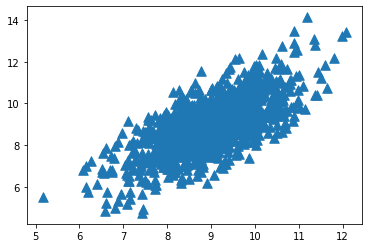

In [5]:
data = loadData('testSet.txt')
plt.subplot(1, 1, 1)
plt.scatter(data[:, 0].flatten().A[0], data[:, 1].flatten().A[0], marker = '^', s = 90)
plt.show()

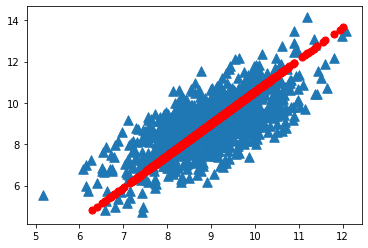

In [6]:
# 下面的例子是将二维数据降到一维。
transData, reconData = pca(data, 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[:,0].flatten().A[0], data[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconData[:,0].flatten().A[0], reconData[:,1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

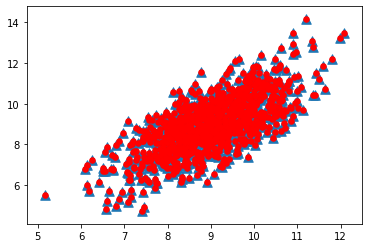

In [7]:
# 下面的例子是将二维数据降到二维， 即不做任何降维。可以看到数据是完全重合的。
transData, reconData = pca(data, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[:,0].flatten().A[0], data[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconData[:,0].flatten().A[0], reconData[:,1].flatten().A[0], marker='o', s=30, c='red')
plt.show()

## 例子：利用 PCA 对半导体制造数据降维

### 1. 缺失值处理
因为获得的数据很多值是缺失的 NaN，我们可以用特征的平均数来填充这些值以便我们计算。

In [8]:
def replaceNaNWithMean(data):
    n = data.shape[1]
    for i in range(n):
        nanIndices = np.isnan(data[:, i])
        mean = np.mean(data[:, i][~nanIndices.A])
        data[:, i][nanIndices.A] = mean
    return data 

In [9]:
sdata = loadData('secom.data', ' ')
sdata = replaceNaNWithMean(sdata)
covMat = np.cov(sdata, rowvar = 0)
eigVals, eigVecs = np.linalg.eig(covMat)
# 可以看出只有前 15 个特征才是最重要的。
print(sdata.shape)
print(eigVals.shape)
print(eigVals[0:50])

(1567, 590)
(590,)
[5.34151979e+07 2.17466719e+07 8.24837662e+06 2.07388086e+06
 1.31540439e+06 4.67693557e+05 2.90863555e+05 2.83668601e+05
 2.37155830e+05 2.08513836e+05 1.96098849e+05 1.86856549e+05
 1.52422354e+05 1.13215032e+05 1.08493848e+05 1.02849533e+05
 1.00166164e+05 8.33473762e+04 8.15850591e+04 7.76560524e+04
 6.66060410e+04 6.52620058e+04 5.96776503e+04 5.16269933e+04
 5.03324580e+04 4.54661746e+04 4.41914029e+04 4.15532551e+04
 3.55294040e+04 3.31436743e+04 2.67385181e+04 1.47123429e+04
 1.44089194e+04 1.09321187e+04 1.04841308e+04 9.48876548e+03
 8.34665462e+03 7.22765535e+03 5.34196392e+03 4.95614671e+03
 4.23060022e+03 4.10673182e+03 3.41199406e+03 3.24193522e+03
 2.74523635e+03 2.35027999e+03 2.16835314e+03 1.86414157e+03
 1.76741826e+03 1.70492093e+03]


### 绘下前 20 个主成分的总方差占比


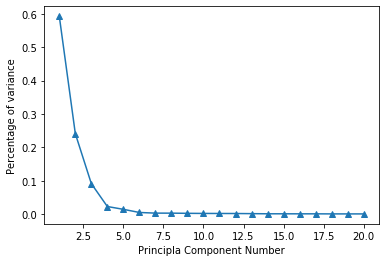

In [10]:
eigIndices = np.argsort(eigVals)[::-1]
sortedVals = eigVals[eigIndices]
total = np.sum(sortedVals)
varPercentages = sortedVals / total

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), varPercentages[:20], marker = '^')
plt.xlabel('Principla Component Number')
plt.ylabel('Percentage of variance')
plt.show()

### 利用 pandas 看下累加方差占比。
可以看出，前 6 个特征就可达到 97% 的数据信息。其它的应该都可看成是噪声了，我们可以将 590 维数的数据降到到 6 维，其它压缩比例约为 100:1。好厉害了。

In [12]:
import pandas as pd

df = pd.DataFrame(varPercentages)
df.head()
df['cumulative percentage'] = df.cumsum()
df.head(20)

,0,cumulative percentage
0,0.592541,0.592541
1,0.241238,0.833779
2,0.091500,0.925279
3,0.023006,0.948285
4,0.014592,0.962877
5,0.005188,0.968065
6,0.003227,0.971291
7,0.003147,0.974438
8,0.002631,0.977069
9,0.002313,0.979382
